In [2]:
from sympy import *
init_printing(use_unicode=True)

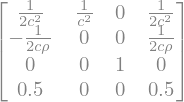

In [9]:
# compute the eigenvector matrix S
c = Symbol('c')
rho = Symbol('rho')
S = Matrix([[1/(2*c**2), 1/c**2, 0, 1/(2*c**2)],
            [-1/(2*rho*c), 0, 0, 1/(2*rho*c)],
            [0, 0, 1, 0],
            [1/2, 0, 0, 1/2]])
S

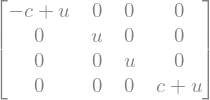

In [30]:
# compute eigenvalue matrix \lambda
u = Symbol('u')
lambda_waves = diag(u-c, u, u, u+c)
lambda_waves

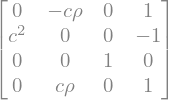

In [33]:
Sinv = Matrix([[0, -rho*c, 0, 1],
              [c**2, 0, 0, -1],
              [0, 0, 1, 0],
              [0, rho*c, 0, 1]])
Sinv

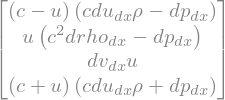

In [66]:
# compute the \mathcal{L} matrix
#drho_dx = Symbol(r'\frac{\partial \rho}{\partial x}')
#du_dx = Symbol(r'\frac{\partial u}{\partial x}')
#dv_vx = Symbol(r'\frac{\partial v}{\partial x}')
#dp_dx = Symbol(r'\frac{\partial p}{\partial x}')
drho_dx = Symbol('drho_dx')
du_dx = Symbol('du_dx')
dv_vx = Symbol('dv_dx')
dp_dx = Symbol('dp_dx')
dQ_dx_def = Matrix([drho_dx, du_dx, dv_vx, dp_dx])
L = simplify(lambda_waves * Sinv * dQ_dx_def)
L

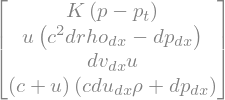

In [67]:
K = Symbol('K')
p = Symbol('p')
p_t = Symbol('p_t')
L_outflow_x1_upper = Matrix([K*(p-p_t), L[1], L[2], L[3]])
L_outflow_x1_upper

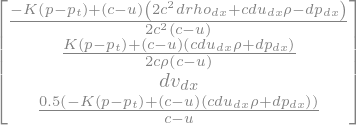

In [68]:
dQ_dx_outflow_x1_upper = simplify(S * Inverse(lambda_waves) * L_outflow_x1_upper)
dQ_dx_outflow_x1_upper

In [81]:
cxxcode(dQ_dx_outflow_x1_upper[0])

'(1.0/2.0)*(-K*(p - p_t) + (c - u)*(2*std::pow(c, 2)*drho_dx + c*du_dx*rho - dp_dx))/(std::pow(c, 2)*(c - u))'

In [78]:
cxxcode(dQ_dx_outflow_x1_upper[1])

'(1.0/2.0)*(K*(p - p_t) + (c - u)*(c*du_dx*rho + dp_dx))/(c*rho*(c - u))'

In [79]:
cxxcode(dQ_dx_outflow_x1_upper[2])

'dv_dx'

In [76]:
cxxcode(dQ_dx_outflow_x1_upper[3])

'0.5*(-K*(p - p_t) + (c - u)*(c*du_dx*rho + dp_dx))/(c - u)'